Get Human-Drawn Image

In [1]:
!pip install transformers torch diffusers kagglehub datasets pillow
!pip install "numpy>=1.26.0,<2.0.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 124.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you hav

In [1]:
import kagglehub, os, random, torch
from datasets import load_dataset
from PIL import Image
from diffusers import DDPMPipeline

In [ ]:
# Load Datsets and find unique images
kaggle_path = kagglehub.dataset_download("subinium/highresolution-anime-face-dataset-512x512")
print(f"Kaggle dataset downloaded to: {kaggle_path}")
hf_dataset = load_dataset("kevinbenoy/anime_random_images")
hf_image_names = set()
for example in hf_dataset['train']:
    if 'image' in example:
        hf_image_names.add(example.get('file_name', ''))
kaggle_images = []
for root, dirs, files in os.walk(kaggle_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            full_path = os.path.join(root, file)
            if file not in hf_image_names:
                kaggle_images.append(full_path)
print(f"Found {len(kaggle_images)} unique images not in HF dataset")

100%|██████████| 15.0G/15.0G [02:45<00:00, 97.7MB/s]

Extracting files...


Kaggle dataset downloaded to: /root/.cache/kagglehub/datasets/subinium/highresolution-anime-face-dataset-512x512/versions/1


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/286 [00:00<?, ?B/s]

data/train-00000-of-00002.parquet:   0%|          | 0.00/523M [00:00<?, ?B/s]

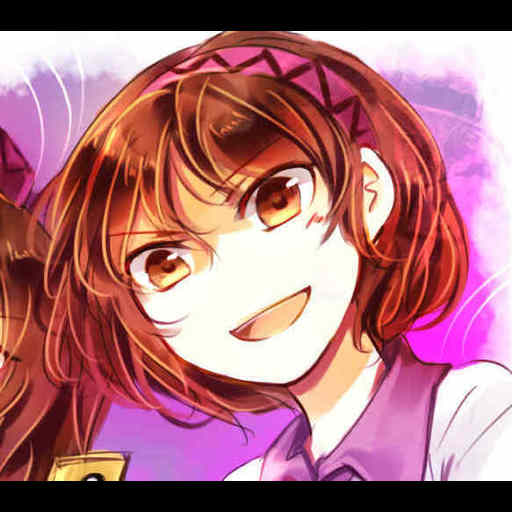

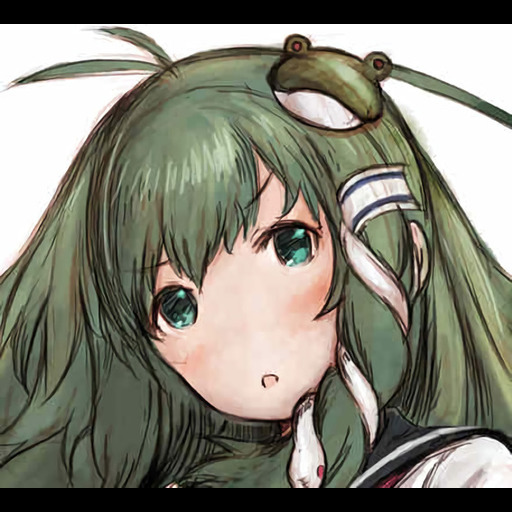

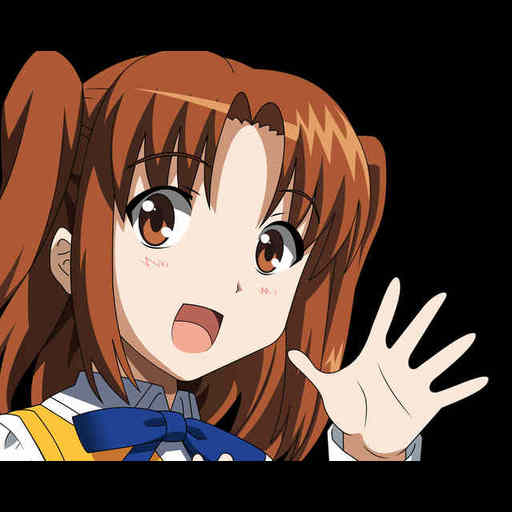

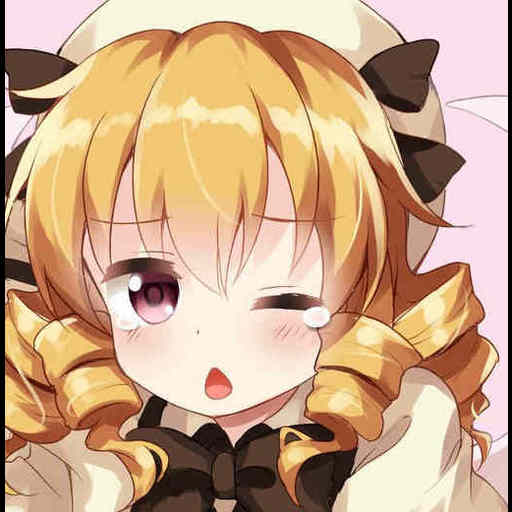

In [ ]:
# Get random unique image
for _ in range(4):
  random_image_path = random.choice(kaggle_images)
  img = Image.open(random_image_path)
  display(img)

Generate AI Image

In [ ]:
# Load Model
repo = "Tomisin05/unconditional-anime-diffusion-model"
model = DDPMPipeline.from_pretrained(repo)
device = "cuda" if torch.cuda.is_available() else "cpu"
torch_dtype = torch.bfloat16 if torch.cuda.is_available() else torch.float32
model.to(device)

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

DDPMPipeline {
  "_class_name": "DDPMPipeline",
  "_diffusers_version": "0.35.2",
  "_name_or_path": "Tomisin05/unconditional-anime-diffusion-model",
  "scheduler": [
    "diffusers",
    "DDPMScheduler"
  ],
  "unet": [
    "diffusers",
    "UNet2DModel"
  ]
}

  0%|          | 0/400 [00:00<?, ?it/s]

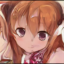

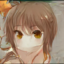

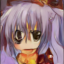

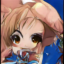

In [ ]:
# Generate Random AI Image
with torch.no_grad():
        images = model(batch_size=4, num_inference_steps=400).images
for i, img in enumerate(images):
    display(img)